In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = './optiver/data'
files = list(sorted([f for f in listdir(data_path)]))

In [3]:
df_daily = []
df_50_days = pd.DataFrame()

for idx, file in enumerate(files):
    df = pd.read_csv(join(data_path, file), parse_dates=['times'], index_col=['times'])
    df = df.resample('1T').mean()
    df_daily.append(df)
    df_50_days = df_50_days.append(df)

In [12]:
orders = pd.read_csv('./out/orders_naive.csv', parse_dates=['times'], index_col=['times'])
orders = orders.resample('60T')
orders

DatetimeIndexResampler [freq=<60 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]

ValueError: Grouper and axis must be same length

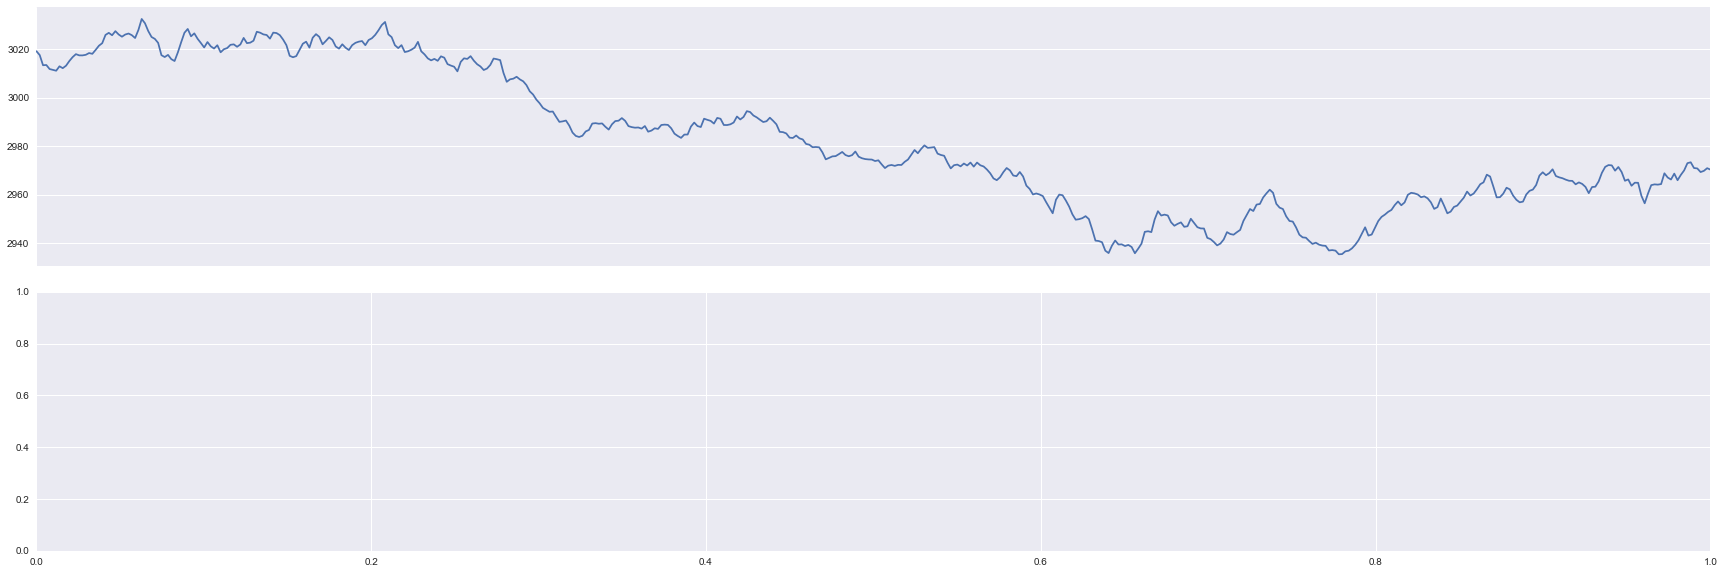

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 10))
plt.subplots_adjust(hspace=0.1)
df_daily[0].price.plot(ax=axes[0], sharex=True)
date = df_daily[0].index[0].date()
orders_all = orders.loc[str(date)].dropna()

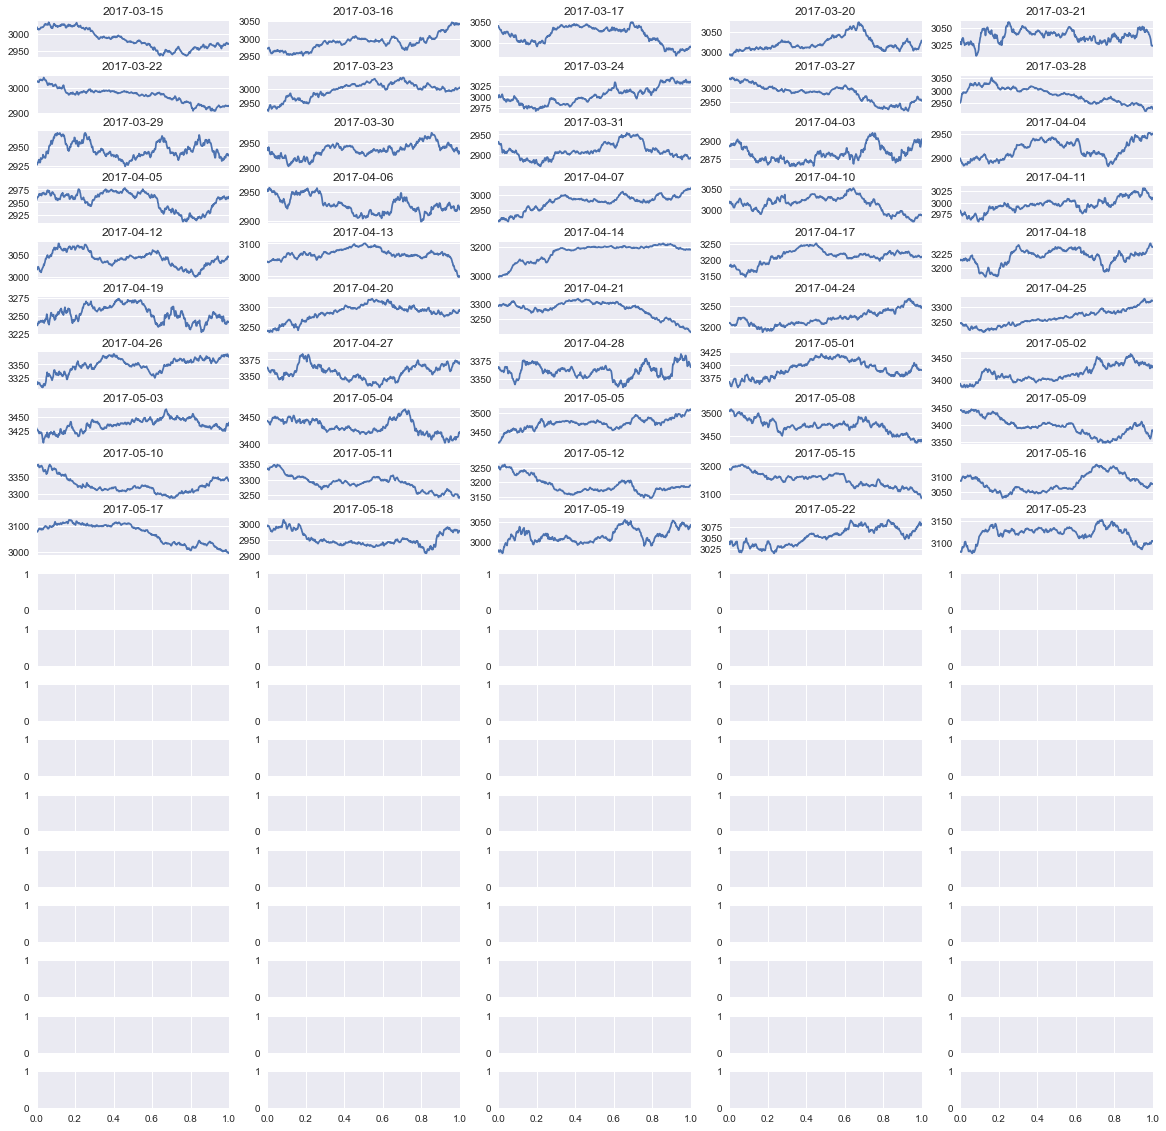

In [9]:
fig, ax_arr = plt.subplots(nrows=20, ncols=5, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for idx, file in enumerate(files):
    df_daily[idx].price.plot(ax=ax_arr[idx // 5, idx % 5], sharex=True)
    ax_arr[idx // 5, idx % 5].set_title(file.split('_')[0])

In [ ]:
fig, axes = plt.subplots(figsize=(25, 5))
for i in range(50):
    plt.axvline(x=i * 30600, color='k', lw=0.5)
df_50_days.price.plot(ax=axes, use_index=False)